In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# The Iris Setosa
# from IPython.display import Image
# url = 'https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
# Image(url,width=300, height=300)

In [9]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


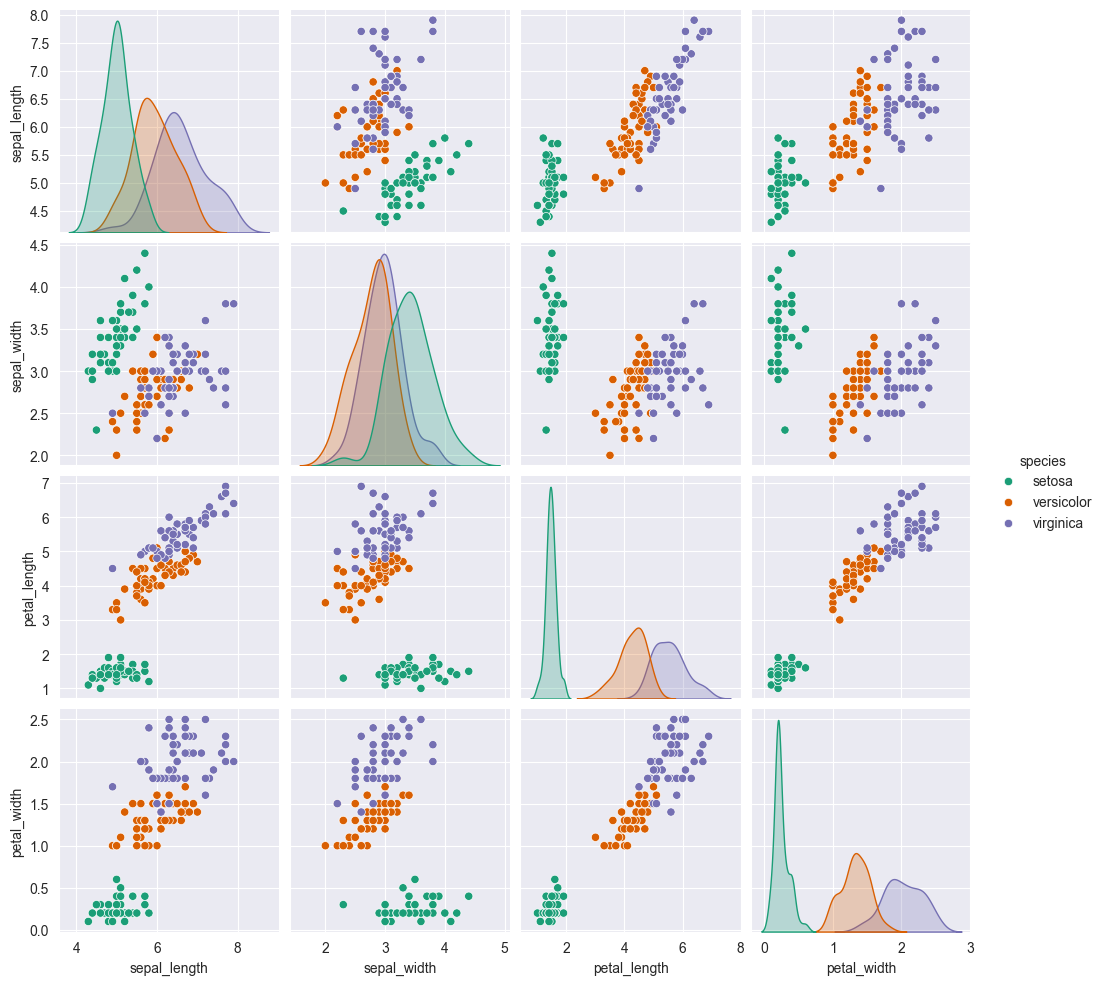

In [78]:
sns.pairplot(iris, hue='species', palette='Dark2')
plt.show()

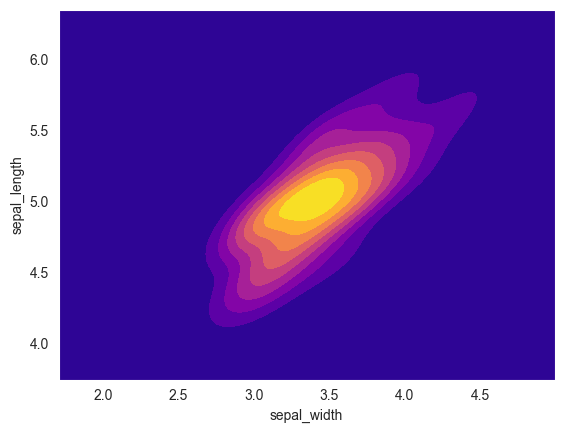

In [87]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(x='sepal_width', y='sepal_length', data=setosa, cmap='plasma', fill=True, thresh=False)
plt.show()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [90]:
from sklearn.svm import SVC

In [91]:
svc = SVC()

In [92]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [93]:
svc_pred = svc.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test, svc_pred))

[[18  0  0]
 [ 0  8  1]
 [ 0  0 18]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.89      0.94         9
   virginica       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45



In [96]:
from sklearn.model_selection import GridSearchCV

In [109]:
grid_param = {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1,0.1,0.01,0.001,0.0001]
}

In [110]:
grid = GridSearchCV(SVC(), param_grid=grid_param, verbose=2)

In [111]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [112]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [113]:
grid_pred = grid.predict(X_test)

In [114]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[18  0  0]
 [ 0  8  1]
 [ 0  0 18]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.89      0.94         9
   virginica       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45

